In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from main import *
import numpy as np

In [190]:
from nlp import *

In [2]:
df0 = pd.read_json('data/data.json')

In [3]:
df = df0.copy()

In [4]:
df = pipeline(df)

In [5]:
df.head(5)

,fraud,approx_payout_date,body_length,channels,delivery_method,description,email_domain,event_created,event_end,event_published,...,country_VI,country_VN,country_ZA,currency_AUD,currency_CAD,currency_EUR,currency_GBP,currency_MXN,currency_NZD,currency_USD
0,1,2010-02-13,3852,5,0.0,\n \nParty Starz Entertaintment & Diverse Inte...,gmail.com,2010-01-06,2010-02-08,2010-01-10,...,0,0,0,0,0,0,0,0,0,1
1,0,2011-02-03,3499,0,1.0,"Join us for a quick, one-night, community-buil...",ruf.org,2010-12-31,2011-01-29,2010-12-31,...,0,0,0,0,0,0,0,0,0,1
2,0,2011-01-28,2601,8,1.0,Teacher Training on the Desired Results Develo...,pvsd.k12.ca.us,2010-11-30,2011-01-23,2010-11-30,...,0,0,0,0,0,0,0,0,0,1
3,0,2014-01-06,12347,6,1.0,Affiliations are now due in respect of the 201...,irishtabletennis.com,2013-02-12,2014-01-01,2013-02-12,...,0,0,0,0,0,1,0,0,0,0
4,0,2011-02-17,2417,11,0.0,Writers and filmmakers need to understand thei...,artsandbusinesscouncil.org,2010-12-10,2011-02-12,2010-12-10,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#list_soup = []

In [ ]:
# for desc in df.description:
#     soup = BeautifulSoup(desc,'html.parser')
#     list_soup.append(soup.get_text())

In [ ]:
#print(list_soup[0])

In [ ]:
#Dropping all features except FRAUD, Descritpion

In [8]:
df_desc = df.filter(items=['fraud','description'])

In [9]:
df_desc.head()

,fraud,description
0,1,\n \nParty Starz Entertaintment & Diverse Inte...
1,0,"Join us for a quick, one-night, community-buil..."
2,0,Teacher Training on the Desired Results Develo...
3,0,Affiliations are now due in respect of the 201...
4,0,Writers and filmmakers need to understand thei...


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df_desc.description
y = df_desc.fraud

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
train_df = pd.DataFrame([X_train,y_train])

In [24]:
train_df = train_df.T

In [26]:
# Import for WordCloud
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS

In [34]:
fraud_words = ' '.join(list(train_df[train_df['fraud']==1]['description']))

In [48]:
fraud_wc = WordCloud(width = 512, height = 512, stopwords=STOPWORDS).generate(fraud_words)

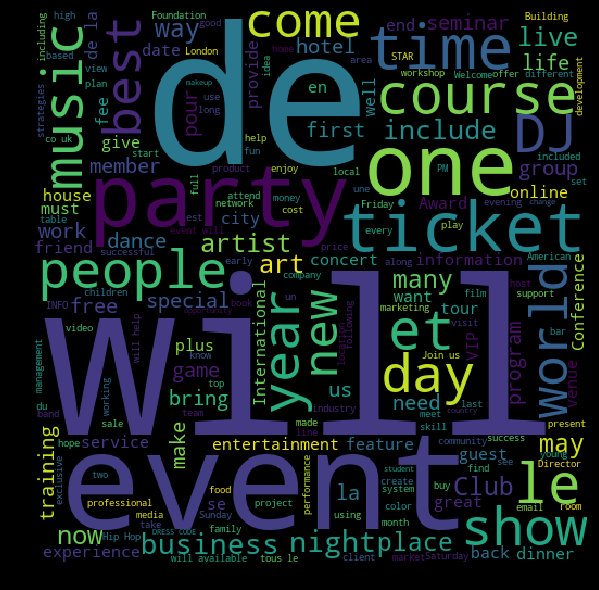

In [49]:
plt.figure(figsize=(10,8),facecolor = 'k')
plt.imshow(fraud_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

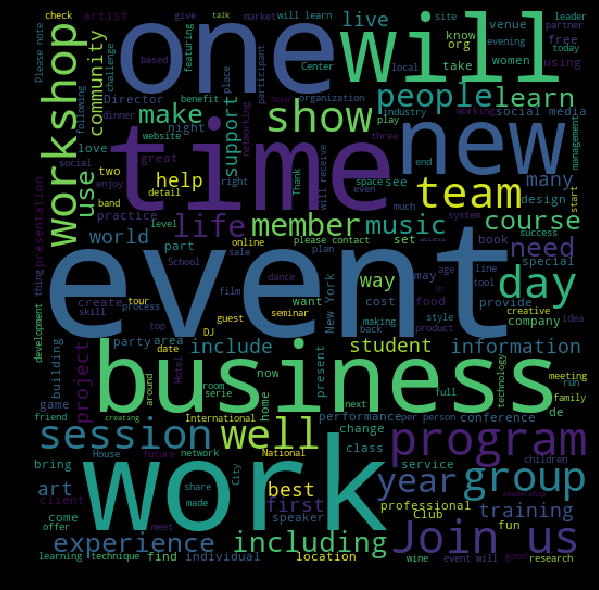

In [42]:
non_fraud_words = ' '.join(list(train_df[train_df['fraud']==0]['description']))
non_fraud_wc = WordCloud(width = 512, height = 512,stopwords=STOPWORDS).generate(non_fraud_words)
plt.figure(figsize=(10,8),facecolor = 'k')
plt.imshow(non_fraud_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [189]:
# Importing tokenize libraries
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [100]:
# def process_description(description,stem=True,stop_words=True):
#     words = [word_tokenize(content.lower()) for content in description]
#     words = [w for w in words if len(w)>2]
#     if stop_words:
#         sw = set(stopwords.words('english'))
#         words = [word for word in words if word not in sw]
#     if stem:
#         stemmer = PorterStemmer()
#         words = [stemmer.stem(word) for word in words]
#     return words

In [101]:
descriptions = train_df.description.tolist()

In [108]:
descriptions[0]

'Welcome\n\xa0\n\n\n5th Annual Earth Transformation Conference: \nIgniting the Inner Spark \nAdditional seminars before and after\nDec 29, 2010 –\xa0Feb 28, 2011 session\nFeaturing: Braco\n\nhttp://earthtransformation.com/\n\xa0\n\n'

In [105]:
lowered = [content.lower() for content in descriptions]

In [109]:
lowered[0]

'welcome\n\xa0\n\n\n5th annual earth transformation conference: \nigniting the inner spark \nadditional seminars before and after\ndec 29, 2010 –\xa0feb 28, 2011 session\nfeaturing: braco\n\nhttp://earthtransformation.com/\n\xa0\n\n'

In [110]:
sw = set(stopwords.words('english'))

In [112]:
words = [word for word in lowered if word not in sw]

In [113]:
words[0]

'welcome\n\xa0\n\n\n5th annual earth transformation conference: \nigniting the inner spark \nadditional seminars before and after\ndec 29, 2010 –\xa0feb 28, 2011 session\nfeaturing: braco\n\nhttp://earthtransformation.com/\n\xa0\n\n'

In [114]:
tokens = [word_tokenize(content) for content in words]

In [115]:
tokens[0]

['welcome',
 '5th',
 'annual',
 'earth',
 'transformation',
 'conference',
 ':',
 'igniting',
 'the',
 'inner',
 'spark',
 'additional',
 'seminars',
 'before',
 'and',
 'after',
 'dec',
 '29',
 ',',
 '2010',
 '–',
 'feb',
 '28',
 ',',
 '2011',
 'session',
 'featuring',
 ':',
 'braco',
 'http',
 ':',
 '//earthtransformation.com/']

In [116]:
porter = PorterStemmer()

In [124]:
docs_porter = [[porter.stem(w) for w in words] for words in tokens]

In [126]:
docs_porter[0]

['welcom',
 '5th',
 'annual',
 'earth',
 'transform',
 'confer',
 ':',
 'ignit',
 'the',
 'inner',
 'spark',
 'addit',
 'seminar',
 'befor',
 'and',
 'after',
 'dec',
 '29',
 ',',
 '2010',
 '–',
 'feb',
 '28',
 ',',
 '2011',
 'session',
 'featur',
 ':',
 'braco',
 'http',
 ':',
 '//earthtransformation.com/']

In [133]:
joined_docs_porter = [' '.join(x) for x in docs_porter]

In [134]:
joined_docs_porter[1]

"... caus i am 30 now and i get to be bossi . i am old , and you get to help me celebr the next decad . i am hold a fundrais in lieu of a birthday parti in honor of the amaz organ for which i work , teen live program . i know that you had all plan on drop lot of cash on my for thi mileston birthday , but let 's go ahead and put our parti hat on for an even better caus than me : homeless youth . pleas read more about thi wonder organ of which i am lucki to be a part at www.teenliving.org . all are welcom ! pleas pass thi along to ani friend , colleagu , and gener peopl who would like to sip beverag on a beauti patio for a great caus . let 's be seriou , that 's how you plan to spend your sunday anyway ... wear your sunday best ! enjoy an open bar ( beer and wine ) and appet at howel & hood , a stun space locat on the first floor of chicago 's legendari tribun tower on michigan avenu . ticket are on sale below ! to purchas a ticket , click below . onc you have purchas your ticket , if yo

In [135]:
joined_docs_porter[4]

"what doe museum fundrais have to offer to tradit chariti fundrais ? are there mani type of fundrais - tradit chariti , hospit , school , univers , the art - or is there just one fundrais disciplin , with specif nuanc between the differ sector ? martin kaufman , director of develop at the museum of london ( just round the corner from the red her ) , believ that we are all in one and the same profess , but that differ sector have nich special from which other sector can learn . in thi 20 minut master class , martin will spell out the activ in fundrais which museum do veri well , and see how relev these might be to tradit chariti . at the same time , he will talk about the area where museum can learn a lot from the chariti sector . as a fundrais for over 20 year , and with experi in tradit chariti , heritag , cultur and educ , martin is well place to cross the boundari in a discuss that is bound to have relev to everyon present . the event kick off at 6.00pm . pleas do your best to arriv

In [136]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# vocab = list(vocab_set)

In [139]:
vc = TfidfVectorizer(analyzer='word', stop_words='english')

In [146]:
feature = vc.fit_transform(joined_docs_porter)

#fit this model to another model


In [142]:
tfidf2 = vc.fit_transform(joined_docs_porter).toarray()

In [147]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(feature,y_train,test_size=0.2)

In [150]:
#Naive Bayes - Gaussian
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train1.toarray(),y_train1)

GaussianNB(priors=None)

In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import cross_val_score

In [153]:
accuracy_score(y_test1,GNB.predict(X_test1.toarray()))

0.8522231909328684

In [154]:
precision_score(y_test1,GNB.predict(X_test1.toarray()))

0.3315068493150685

In [155]:
recall_score(y_test1,GNB.predict(X_test1.toarray()))

0.5601851851851852

In [173]:
f1_score(y_test1,GNB.predict(X_test1.toarray()))

0.4165232358003443

In [ ]:
# Gaussian assumes normal distribution

In [174]:
#Naive Bayes - Multibinomial
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB(alpha=0.3)
MNB.fit(X_train1.toarray(),y_train1)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [175]:
accuracy_score(y_test1,MNB.predict(X_test1.toarray()))

0.9032258064516129

In [176]:
precision_score(y_test1,MNB.predict(X_test1.toarray()))

0.39285714285714285

In [177]:
recall_score(y_test1,MNB.predict(X_test1.toarray()))

0.05092592592592592

In [178]:
f1_score(y_test1,MNB.predict(X_test1.toarray()))

0.0901639344262295

In [165]:
#Naive Bayes - Bernoulli

In [166]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train1.toarray(),y_train1)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [167]:
accuracy_score(y_test1,BNB.predict(X_test1.toarray()))

0.8910200523103748

In [168]:
precision_score(y_test1,BNB.predict(X_test1.toarray()))

0.14583333333333334

In [169]:
recall_score(y_test1,BNB.predict(X_test1.toarray()))

0.032407407407407406

In [172]:
f1_score(y_test1,BNB.predict(X_test1.toarray()))

0.053030303030303025

In [ ]:
# Decision Trees

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
# val_scores = []
# for i in range(2,5):
#     DT = DecisionTreeClassifier(min_samples_split=i, random_state=1,class_weight='balanced')
#     scores = cross_val_score(DT, X_train1.toarray(), y_train1,scoring='f1')
#     val_scores.append([np.mean(scores),i])
# val_scores = np.array(val_scores)
# print('The best scores happens on:',val_scores[val_scores[:,0]==max(val_scores[:,0]),1:],
#       ', where F1 =',val_scores[val_scores[:,0]==max(val_scores[:,0]),0])

In [183]:
DT1 = DecisionTreeClassifier(min_samples_split=4, random_state=1,class_weight='balanced')
DT1.fit(X_train1.toarray(),y_train1)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [185]:
accuracy_score(y_test1,DT1.predict(X_test1.toarray()))

0.8225806451612904

In [186]:
precision_score(y_test1,DT1.predict(X_test1.toarray()))

0.28824833702882485

In [187]:
recall_score(y_test1,DT1.predict(X_test1.toarray()))

0.6018518518518519

In [188]:
f1_score(y_test1,DT1.predict(X_test1.toarray()))

0.38980509745127434

In [160]:
#Naive Bayes - Multibinomial
# from sklearn.naive_bayes import MultinomialNB
# val_scores = []
# listalpha = np.linspace(0.01,1,num=5)
# for i in listalpha:
#     MNB = MultinomialNB(alpha=i)# alpha is Laplace smoothing parameter
#     scores = cross_val_score(MNB, X_train1.toarray(), y_train1,scoring='f1')
#     val_scores.append([np.mean(scores),i])
# val_scores = np.array(val_scores)
# print('The best scores happens on:',val_scores[val_scores[:,0]==max(val_scores[:,0]),1:],
#       ', where F1 =',val_scores[val_scores[:,0]==max(val_scores[:,0]),0])



In [ ]:
#Naive Bayes - Bernoulli
# from sklearn.naive_bayes import BernoulliNB
# val_scores_bern = []
# listalpha = np.linspace(0.01,1,num=5)
# for i in listalpha:
#     BNB = BernoulliNB(alpha=i)# alpha is Laplace smoothing parameter
#     scores = cross_val_score(MNB, X_train1.toarray(), y_train1,scoring='f1')
#     val_scores_bern.append([np.mean(scores),i])
# val_scores_bern = np.array(val_scores_bern)
# print('The best scores happens on:',val_scores_bern[val_scores_bern[:,0]==max(val_scores_bern[:,0]),1:],
#       ', where F1 =',val_scores_bern[val_scores_bern[:,0]==max(val_scores_bern[:,0]),0])

In [ ]:
# [[vocab_set.add(token) for token in tokens] for tokens in my_docs]
# vocab = list(vocab_set)

In [ ]:
# vocab_dict = {word: i for i, word in enumerate(vocab)}

In [ ]:
# word_counts = np.zeros((len(docs), len(vocab)))
# for doc_id, words in enumerate(my_docs):
#     for word in words:
#         word_id = vocab_dict[word]
#         word_counts[doc_id][word_id] += 1
        

In [ ]:
# df = np.sum(word_counts > 0, axis=0)

In [ ]:
# tf_norm = word_counts.sum(axis=1)
# tf_norm[tf_norm == 0] = 1
# tf = word_counts / tf_norm.reshape(len(my_docs), 1)

In [ ]:
# idf = np.log((len(my_docs) + 1.) / (1. + df)) + 1.
# tfidf = tf * idf

In [ ]:
# tfidf_norm = np.sqrt((tfidf ** 2).sum(axis=1))
# tfidf_norm[tfidf_norm == 0] = 1
# tfidf_normed = tfidf / tfidf_norm.reshape(len(my_docs), 1)

In [ ]:
# def tokenize(doc):
#     '''
#     INPUT: string
#     OUTPUT: list of strings

#     Tokenize and stem/lemmatize the document.
#     '''
#     return [snowball.stem(word) for word in word_tokenize(doc.lower())]